In [1]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from svhn_utils import one_hot, pad_one_hots, shuffle
from training_utils import get_pred, accuracy, train_model

In [2]:
matplotlib.style.use("ggplot")
%matplotlib inline

In [4]:
train_mat = loadmat('D:/Data/SVHN/tensors2/train.mat')
test_mat = loadmat('D:/Data/SVHN/tensors2/test.mat')

train_y = train_mat['labels'].reshape(-1)
test_y = test_mat['labels'].reshape(-1)
train_files = train_mat['files']
test_files = test_mat['files']

In [6]:
train_x = train_mat['data'].astype('float32')
del train_mat
train_x = train_x / 255.0 - 0.5

In [5]:
test_x = test_mat['data'].astype('float32')
del test_mat
test_x = test_x / 255.0 - 0.5

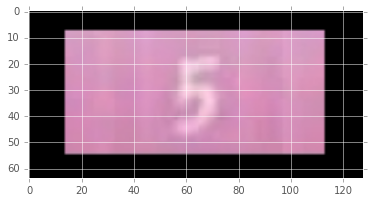

In [9]:
plt.imshow((test_x[0] + 0.5) * 255)

In [10]:
train_x, train_y = shuffle(train_x, train_y)
# test_x, test_y = shuffle(test_x, test_y)

In [11]:
train_y.shape

(33402,)

In [12]:
pd.Series([len(y.flatten()) for y in train_y]).value_counts()

2    18130
3     8691
1     5137
4     1434
5        9
6        1
dtype: int64

In [13]:
pd.Series([len(y.flatten()) for y in test_y]).value_counts()

2    8356
1    2483
3    2081
4     146
5       2
dtype: int64

In [14]:
train_y_lens = np.array([len(y.flatten()) for y in train_y])
train_y = train_y[train_y_lens <= 5] 
train_x = train_x[train_y_lens <= 5]

In [15]:
def format_labels(y):
    y = np.array([one_hot(_y.flatten()) for _y in y]).reshape([-1])
    return np.array([pad_one_hots(_y) for _y in y])
train_y = format_labels(train_y)
test_y = format_labels(test_y)

In [16]:
valid_x = train_x[:len(train_x)//4]
valid_y = train_y[:len(train_y)//4]
train_x = train_x[len(train_x)//4:]
train_y = train_y[len(train_y)//4:]

In [39]:
import models
import imp
imp.reload(models)

<module 'models' from 'C:\\Users\\Ian\\Documents\\Programming\\SVHN_DeepLearning\\models.py'>

# Trying deeper model v2

In [51]:
deeper_model_v7 = models.make_deeper_model_v7(train_x.shape)

In [52]:
[layer.output_shape for layer in deeper_model_v7.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 5),
 (None, 64, 128, 25),
 (None, 64, 128, 50),
 (None, 32, 64, 50),
 (None, 32, 64, 50),
 (None, 32, 64, 100),
 (None, 32, 64, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 16, 32, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 200),
 (None, 8, 16, 100),
 (None, 8, 16, 50),
 (None, 4, 8, 50),
 (None, 1600),
 (None, 200),
 (None, 200),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

In [ ]:
deeper_model_v7, train_acc, valid_acc = train_model(deeper_model_v7, train_x, train_y, 
                                                    valid_x, valid_y, n_epochs=30, 
                                                    batch_size=20)

# Trying to fine tune VGG16

In [42]:
vgg_model_v1 = models.make_vgg_model_v1(train_x[0].shape)

In [43]:
[layer.output_shape for layer in vgg_model_v1.layers]

[(None, 64, 128, 3),
 (None, 64, 128, 64),
 (None, 64, 128, 64),
 (None, 32, 64, 64),
 (None, 32, 64, 128),
 (None, 32, 64, 128),
 (None, 16, 32, 128),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 16, 32, 256),
 (None, 8, 16, 256),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 8, 16, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 4, 8, 512),
 (None, 2, 4, 512),
 (None, 4096),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 1000),
 (None, 55),
 (None, 5, 11),
 (None, 5, 11)]

In [44]:
vgg_model_v1, train_acc, valid_acc = train_model(vgg_model_v1, train_x, train_y, 
                                                 valid_x, valid_y, n_epochs=50, 
                                                 batch_size=20)

KeyboardInterrupt: 